In [1]:
import os
import glob

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import imblearn

import warnings
warnings.filterwarnings('ignore')


# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import ColorbarBase

# Scipy
from scipy import interpolate
from scipy import spatial
from scipy import stats
from scipy.cluster import hierarchy
# Others
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import pickle
from math import modf

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
import xgboost as xgb
from sklearn.linear_model import SGDClassifier


sns.set(style='white', context='notebook', palette='deep')
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
import warnings
warnings.filterwarnings("ignore")


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedShuffleSplit, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, precision_recall_fscore_support, roc_auc_score
from sklearn.inspection import plot_partial_dependence

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.exceptions import ConvergenceWarning

pd.options.display.float_format = '{:.5f}'.format
import numpy as np
import matplotlib.pyplot as plt
plt.style.context('seaborn-talk')
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

# Seaborn style (figures)
sns.set(context='notebook', style='whitegrid')
sns.set_style('ticks', {'xtick.direction':'in', 'ytick.direction':'in'})
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn import metrics

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [2]:
observation_window1 = pd.read_csv('features_201506.csv')
observation_window2 = pd.read_csv('features_201512.csv')
outcome_window = pd.read_csv('features_201606.csv')

In [3]:
print('Shape of Observation Window 1 : ', observation_window1.shape)
print('Shape of Observation Window 2 : ', observation_window2.shape)
print('Shape of Outcome Window 1 : ', outcome_window.shape)

Shape of Observation Window 1 :  (269521, 88)
Shape of Observation Window 2 :  (265875, 88)
Shape of Outcome Window 1 :  (261846, 88)


In [4]:
features = pd.concat([observation_window1, observation_window2], axis=0, ignore_index=True)

In [5]:
features = features.drop_duplicates()

In [6]:
features = features[features['acc_balance']>1500]
features = features[features['acc_tenure']>6]
features = features.reset_index(drop = True)
features.drop(['churn'], axis = 1, inplace = True)
print('Shape of Features : ', features.shape)

Shape of Features :  (257411, 87)


In [7]:
outcome_window = outcome_window[['new_id', 'churn']]
df = pd.merge(features, outcome_window, on = 'new_id')

new_id                       0.00000
group_no                     0.00000
postcode                     0.00000
channel                      0.00000
gender                       0.00000
age                          0.00000
num_accounts                 0.00000
acc_tenure                   0.00000
acc_balance                  0.00000
num_options                  0.00000
stmt_pref                    0.00000
annualrpt_pref               0.00000
promotional_pref             0.00000
returned_mail_count          0.00000
rb_flag                      0.00000
block_flag                   0.00000
has_email                    0.00000
has_work_tel                 0.00000
has_home_tel                 0.00000
has_mobile                   0.00000
num_contacts                 0.00000
num_accounts_change_amount   0.00000
acc_balance_change_amount    0.00000
num_options_change_amount    0.00000
num_contacts_change_amount   0.00000
num_accounts_change_ratio    0.00000
acc_balance_change_ratio     0.00000
n

<AxesSubplot:>

Text(0.5, 1.0, 'Percentage of Missing Values')

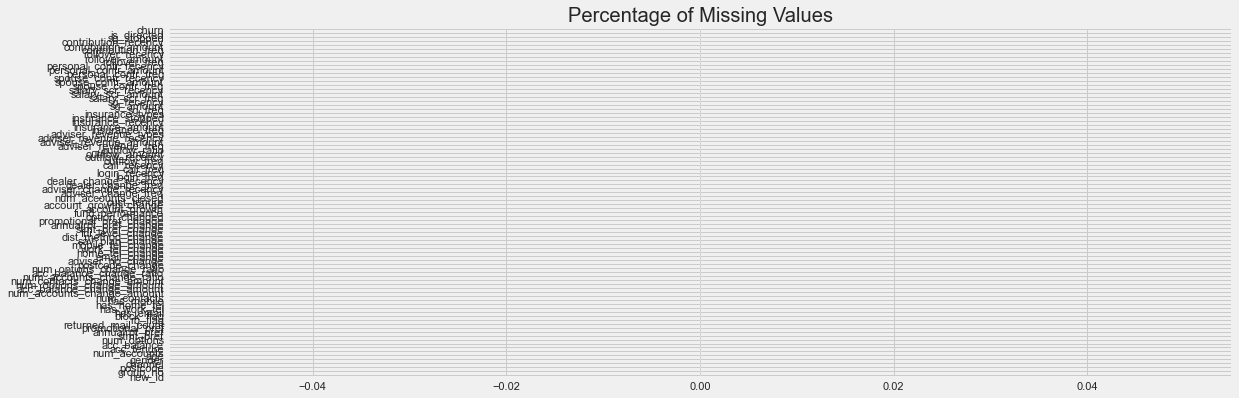

In [8]:
plt.style.use('fivethirtyeight')
display(df.isna().sum()/len(df)*100)
(df.isna().sum()/len(df)*100).plot(kind = 'barh', figsize = (17,6));
plt.title('Percentage of Missing Values')
plt.show()

0   86.14847
1   13.85153
Name: churn, dtype: float64

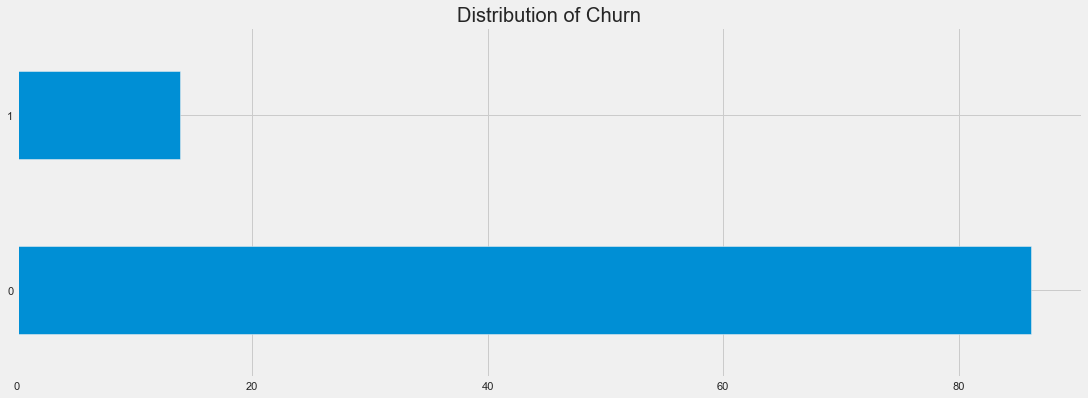

In [9]:
display(df['churn'].value_counts()/len(df)*100)
(df['churn'].value_counts()/len(df)*100).plot(kind = 'barh', figsize = (17,6));
plt.title('Distribution of Churn')
plt.show();

In [10]:
print("Shape of Combined Dataframe : ", df.shape)

Shape of Combined Dataframe :  (238277, 88)


In [11]:
finalDF = df.copy()
finalDF = finalDF.drop_duplicates()
print("Shape of Combined Dataframe : ", finalDF.shape)

Shape of Combined Dataframe :  (238277, 88)


In [12]:
finalDF.drop_duplicates(subset='new_id', keep='last', inplace=True, ignore_index=False)
print("Shape of Combined Dataframe : ", finalDF.shape)

Shape of Combined Dataframe :  (124363, 88)


0   85.90980
1   14.09020
Name: churn, dtype: float64

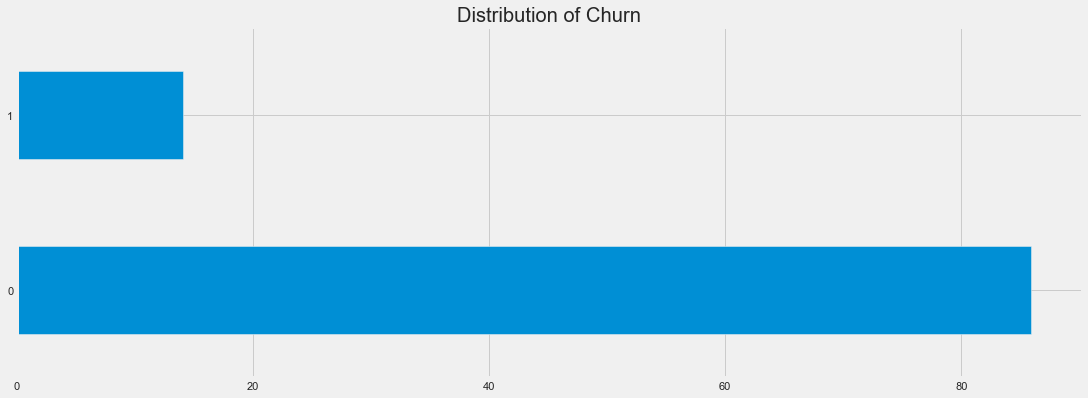

In [13]:
display(finalDF['churn'].value_counts()/len(finalDF)*100)
(finalDF['churn'].value_counts()/len(finalDF)*100).plot(kind = 'barh', figsize = (17,6));
plt.title('Distribution of Churn')
plt.show();

In [14]:
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def find_categorical(df, cutoff=10):
    """
        Function to find categorical columns in the dataframe.
    """
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [15]:
finalDF.drop(['new_id'], axis = 1, inplace = True)
finalDF.drop(['postcode'], axis = 1, inplace = True)
finalDF.drop(['group_no'], axis = 1, inplace = True)

In [16]:
finalDF['churn'] = finalDF['churn'].astype(object)
finalDF['age'] = finalDF['age'].astype(float)
finalDF['num_accounts'] = finalDF['num_accounts'].astype(float)
finalDF['acc_tenure'] = finalDF['acc_tenure'].astype(float)
finalDF['acc_balance'] = finalDF['acc_balance'].astype(float)
finalDF['num_options'] = finalDF['num_options'].astype(float)
finalDF['acc_balance_change_amount'] = finalDF['acc_balance_change_amount'].astype(float)
finalDF['num_options_change_amount'] = finalDF['num_options_change_amount'].astype(float)
finalDF['acc_balance_change_ratio'] = finalDF['acc_balance_change_ratio'].astype(float)
finalDF['num_accounts_change_ratio'] = finalDF['num_accounts_change_ratio'].astype(float)
finalDF['num_options_change_ratio'] = finalDF['num_options_change_ratio'].astype(float)
finalDF['fund_performance'] = finalDF['fund_performance'].astype(float)
finalDF['account_growth'] = finalDF['account_growth'].astype(float)
finalDF['account_growth_change'] = finalDF['account_growth_change'].astype(float)
finalDF['cust_tenure'] = finalDF['cust_tenure'].astype(float)
finalDF['dealer_change_recency'] = finalDF['dealer_change_recency'].astype(float)
finalDF['login_freq'] = finalDF['login_freq'].astype(float)
finalDF['login_recency'] = finalDF['login_recency'].astype(float)
finalDF['call_freq'] = finalDF['call_freq'].astype(float)
finalDF['call_recency'] = finalDF['call_recency'].astype(float)
finalDF['outflow_freq'] = finalDF['outflow_freq'].astype(float)
finalDF['outflow_recency'] = finalDF['outflow_recency'].astype(float)
finalDF['outflow_amount'] = finalDF['outflow_amount'].astype(float)
finalDF['outflow_ratio'] = finalDF['outflow_ratio'].astype(float)
finalDF['adviser_revenue_freq'] = finalDF['adviser_revenue_freq'].astype(float)
finalDF['adviser_revenue_amount'] = finalDF['adviser_revenue_amount'].astype(float)
finalDF['sg_amount'] = finalDF['sg_amount'].astype(float)
finalDF['salary_scr_amount'] = finalDF['salary_scr_amount'].astype(float)
finalDF['spouse_contr_amount'] = finalDF['spouse_contr_amount'].astype(float)
finalDF['personal_contr_amount'] = finalDF['personal_contr_amount'].astype(float)
finalDF['rollover_amount'] = finalDF['rollover_amount'].astype(float)
finalDF['contribution_amount'] = finalDF['contribution_amount'].astype(float)

In [17]:
categoricals = find_categorical(finalDF, cutoff=12)

In [18]:
summarize_categoricals(finalDF[categoricals], show_levels=True)

,Levels,No. of Levels,No. of Missing Values
channel,"[Other Advisers, CBA Third Party, Count Financ...",6,0
gender,"[F, M]",2,0
num_accounts,"[1.0, 2.0, 5.0, 3.0, 7.0, 6.0, 4.0, 8.0, 10.0,...",11,0
stmt_pref,"[E, M, N]",3,0
annualrpt_pref,"[N, E, M]",3,0
promotional_pref,"[E, M, N]",3,0
returned_mail_count,"[0, 1, 2]",3,0
rb_flag,[0],1,0
block_flag,"[0, 1]",2,0
has_email,"[1, 0]",2,0


In [19]:
numericals = list(set(finalDF.columns.tolist()) - set(categoricals)) + list(set(categoricals) - set(finalDF.columns.tolist()))

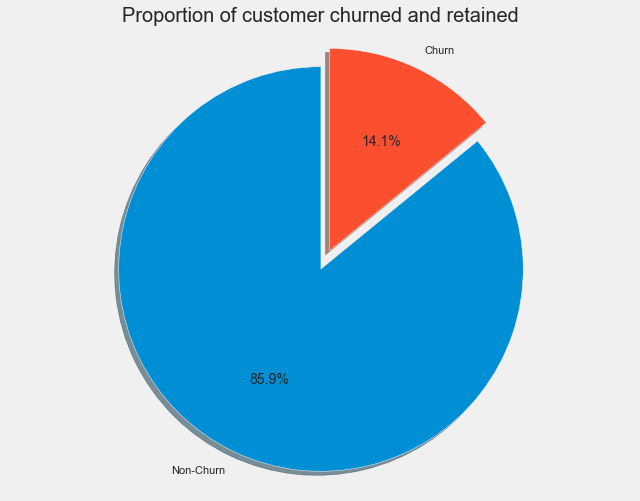

In [20]:
labels = 'Non-Churn', 'Churn'
sizes = [finalDF.churn[finalDF['churn']==0].count(), finalDF.churn[finalDF['churn']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show();

In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
finalDF.head()

,channel,gender,age,num_accounts,acc_tenure,acc_balance,num_options,stmt_pref,annualrpt_pref,promotional_pref,returned_mail_count,rb_flag,block_flag,has_email,has_work_tel,has_home_tel,has_mobile,num_contacts,num_accounts_change_amount,acc_balance_change_amount,num_options_change_amount,num_contacts_change_amount,num_accounts_change_ratio,acc_balance_change_ratio,num_options_change_ratio,postcode_change,adviser_no_change,email_change,home_tel_change,work_tel_change,mobile_tel_change,sav_plan_change,dist_method_change,fni_level_change,stmt_pref_change,annualrpt_pref_change,promotional_pref_change,option_changed,fund_performance,account_growth,account_growth_change,cust_tenure,num_accounts_closed,adviser_change_freq,adviser_change_recency,dealer_change_freq,dealer_change_recency,login_freq,login_recency,call_freq,call_recency,outflow_freq,outflow_recency,outflow_amount,outflow_ratio,adviser_revenue_freq,adviser_revenue_amount,adviser_revenue_recency,adviser_revenue_types,insurance_freq,insurance_amount,insurance_recency,insurance_stopped,insurance_types,sg_freq,sg_amount,sg_recency,salary_scr_freq,salary_scr_amount,salary_scr_recency,spouse_contr_freq,spouse_contr_amount,spouse_contr_recency,personal_contr_freq,personal_contr_amount,personal_contr_recency,rollover_freq,rollover_amount,rollover_recency,contribution_freq,contribution_amount,contribution_recency,sg_stopped,is_directed,churn
1,Other Advisers,F,60.91000,1.00000,10.49000,70473.16000,1.00000,E,N,E,0,0,0,1,0,1,1,3,0,2017.76000,0.00000,0,0.00000,0.02900,0.00000,same,same,same,same,same,same,same,same,same,same,same,same,0,2.70000,76.53000,-0.52000,15.88000,0,0,540,0,540.00000,0.00000,540.00000,0.00000,540.00000,0.00000,540.00000,0.00000,0.00000,12.00000,426.53000,0,1,0,0.00000,18,0,0,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0,0
3,CBA Third Party,M,60.13000,1.00000,13.53000,64836.76000,8.00000,M,N,M,0,0,0,0,0,1,0,1,0,-23300.18000,0.00000,0,0.00000,-0.26400,0.00000,same,same,same,same,same,same,same,same,same,same,same,same,0,4.70000,94.54000,-1.08000,15.85000,0,0,540,0,540.00000,0.00000,540.00000,0.00000,540.00000,3.00000,29.00000,27000.00000,0.29400,12.00000,467.65000,0,1,0,0.00000,18,0,0,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0,0
5,Other Advisers,F,50.41000,1.00000,12.73000,79554.82000,4.00000,E,N,E,1,0,0,1,0,1,1,3,0,1593.00000,0.00000,0,0.00000,0.02000,0.00000,same,same,same,same,same,same,same,same,same,same,same,same,0,2.32000,95.29000,0.39000,15.84000,0,0,540,0,540.00000,0.00000,540.00000,0.00000,540.00000,0.00000,540.00000,0.00000,0.00000,12.00000,487.81000,0,1,0,0.00000,18,0,0,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0,0
7,Other Advisers,M,59.17000,2.00000,10.76000,42806.25000,2.00000,M,N,N,0,0,0,0,0,1,0,1,0,1122.73000,0.00000,0,0.00000,0.02600,0.00000,same,same,same,same,same,same,same,same,same,same,same,same,0,1.80000,0.00000,0.00000,15.82000,0,0,540,0,540.00000,0.00000,540.00000,0.00000,540.00000,1.00000,337.00000,-5000.00000,-0.13225,12.00000,728.18000,0,3,0,0.00000,0,0,2,12,7966.25000,0,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0,0
9,Count Financial,M,55.13000,1.00000,13.16000,9558.62000,1.00000,M,N,M,0,0,0,0,0,0,1,1,0,261.54000,0.00000,0,0.00000,0.02700,0.00000,same,same,same,same,same,same,same,same,same,same,same,same,0,2.70000,76.53000,-0.52000,23.37000,0,0,540,0,540.00000,0.00000,540.00000,0.00000,540.00000,0.00000,540.00000,0.00000,0.00000,12.00000,57.88000,0,1,0,0.00000,18,0,0,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0.00000,18,0,0,0


Text(0.5, 1.0, 'Correlation plot (Pearson)')

<AxesSubplot:title={'center':'Correlation plot (Pearson)'}>

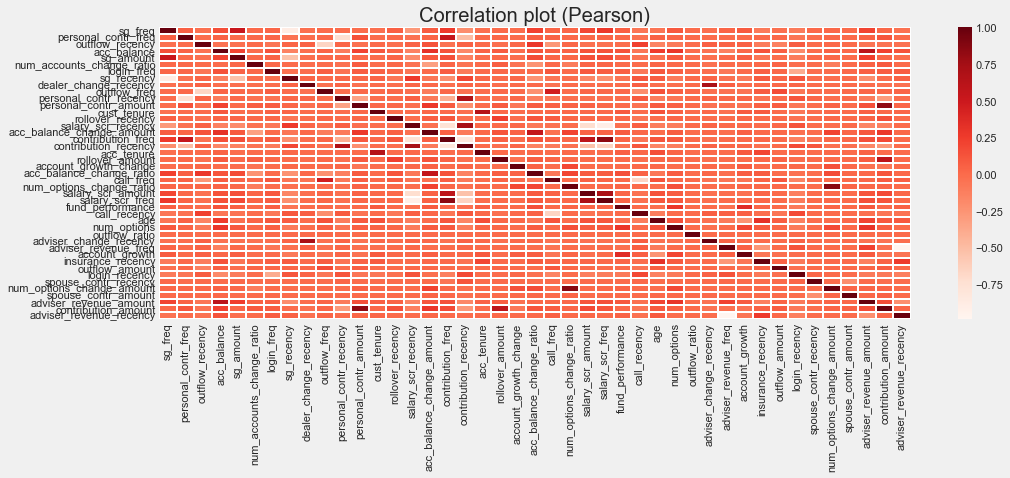

In [22]:
# plt.figure(figsize = (17,14))
plt.title('Correlation plot (Pearson)')
corr = finalDF[numericals].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="Reds")
# plt.show();

In [23]:
# numericals = list(set(finalDF.columns.tolist()) - set(categoricals)) + list(set(categoricals) - set(finalDF.columns.tolist()))

In [24]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,sg_freq,personal_contr_freq,outflow_recency,acc_balance,sg_amount,num_accounts_change_ratio,login_freq,sg_recency,dealer_change_recency,outflow_freq,personal_contr_recency,personal_contr_amount,cust_tenure,rollover_recency,salary_scr_recency,acc_balance_change_amount,contribution_freq,contribution_recency,acc_tenure,rollover_amount,account_growth_change,acc_balance_change_ratio,call_freq,num_options_change_ratio,salary_scr_amount,salary_scr_freq,fund_performance,call_recency,age,num_options,outflow_ratio,adviser_change_recency,adviser_revenue_freq,account_growth,insurance_recency,outflow_amount,login_recency,spouse_contr_recency,num_options_change_amount,spouse_contr_amount,adviser_revenue_amount,contribution_amount,adviser_revenue_recency
sg_freq,1.00,0.05,-0.03,0.15,0.53,0.01,0.03,-0.88,-0.03,0.00,-0.01,-0.01,-0.03,0.05,-0.28,0.08,0.26,-0.21,-0.03,-0.00,-0.01,0.22,0.03,0.03,0.19,0.28,0.06,-0.06,-0.06,0.10,-0.00,-0.03,0.04,0.09,-0.09,-0.02,-0.10,0.01,0.02,0.00,0.21,0.01,-0.04
personal_contr_freq,0.05,1.00,-0.01,0.05,0.00,0.01,0.03,-0.05,-0.01,0.01,-0.74,0.13,-0.00,0.01,-0.04,0.04,0.54,-0.50,0.00,0.01,-0.00,0.07,0.04,0.01,0.02,0.03,0.01,-0.04,0.05,0.03,-0.00,-0.01,-0.00,0.00,0.01,0.01,-0.06,-0.01,0.01,0.00,0.05,0.11,0.00
outflow_recency,-0.03,-0.01,1.00,-0.05,-0.04,0.00,-0.06,0.04,0.05,-0.67,0.03,-0.04,0.00,-0.03,0.04,0.13,-0.04,0.05,0.00,-0.03,0.02,0.28,-0.27,0.02,-0.03,-0.03,-0.02,0.23,-0.15,-0.09,-0.01,0.06,0.05,0.06,-0.11,-0.13,0.08,0.00,0.01,-0.00,-0.06,-0.05,-0.04
acc_balance,0.15,0.05,-0.05,1.00,0.21,-0.01,0.13,-0.14,-0.02,0.04,-0.11,0.20,0.10,0.03,-0.15,0.32,0.14,-0.18,0.04,0.08,-0.01,0.12,0.06,0.04,0.13,0.13,0.13,-0.06,0.25,0.29,-0.00,-0.05,-0.13,0.02,0.13,0.05,-0.20,-0.00,0.05,0.01,0.60,0.22,0.13
sg_amount,0.53,0.00,-0.04,0.21,1.00,0.02,0.04,-0.54,-0.02,0.01,0.01,0.00,-0.00,0.04,-0.20,0.09,0.15,-0.13,-0.01,0.01,-0.01,0.17,0.03,0.02,0.14,0.17,0.05,-0.05,-0.03,0.10,-0.00,-0.03,0.01,0.07,-0.06,-0.02,-0.11,0.01,0.02,-0.00,0.24,0.03,-0.02
num_accounts_change_ratio,0.01,0.01,0.00,-0.01,0.02,1.00,0.02,-0.02,-0.02,-0.00,-0.03,0.07,-0.01,0.02,-0.05,-0.32,0.04,-0.05,-0.00,0.07,-0.05,-0.25,0.01,-0.11,0.04,0.04,-0.00,-0.01,0.03,0.01,-0.00,-0.04,-0.01,-0.01,0.01,0.03,-0.02,-0.00,-0.10,0.00,0.05,0.10,0.00
login_freq,0.03,0.03,-0.06,0.13,0.04,0.02,1.00,-0.03,-0.02,0.06,-0.06,0.07,0.04,0.02,-0.08,0.01,0.07,-0.09,0.00,0.01,-0.01,-0.00,0.10,-0.00,0.09,0.07,0.06,-0.08,0.10,0.06,-0.00,-0.02,-0.07,0.00,0.06,0.02,-0.39,-0.01,-0.00,0.01,0.05,0.08,0.07
sg_recency,-0.88,-0.05,0.04,-0.14,-0.54,-0.02,-0.03,1.00,0.03,-0.00,0.02,0.02,0.03,-0.07,0.26,-0.08,-0.22,0.19,0.02,-0.01,0.02,-0.24,-0.06,-0.03,-0.17,-0.22,-0.06,0.11,0.07,-0.10,0.00,0.04,-0.04,-0.09,0.08,0.03,0.11,-0.01,-0.02,-0.00,-0.21,-0.01,0.05
dealer_change_recency,-0.03,-0.01,0.05,-0.02,-0.02,-0.02,-0.02,0.03,1.00,-0.03,0.02,-0.03,-0.00,-0.02,0.02,0.01,-0.02,0.03,0.00,-0.02,0.00,0.01,-0.05,-0.00,-0.02,-0.02,-0.01,0.07,-0.01,-0.02,0.00,0.72,0.05,-0.01,0.01,0.02,0.03,0.00,-0.01,-0.00,-0.01,-0.03,-0.03
outflow_freq,0.00,0.01,-0.67,0.04,0.01,-0.00,0.06,-0.00,-0.03,1.00,-0.02,0.02,0.00,0.02,-0.02,-0.11,0.02,-0.03,-0.00,0.01,-0.01,-0.23,0.46,-0.02,0.03,0.02,0.01,-0.20,0.14,0.05,0.01,-0.03,-0.04,-0.05,0.08,0.17,-0.07,-0.00,-0.01,0.00,0.04,0.03,0.04


In [25]:
def remove_collinear_features(x, threshold = 0.99):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [26]:
finalDF = remove_collinear_features(finalDF, threshold = 0.9)

num_accounts_change_ratio | num_accounts_change_amount | 0.97
adviser_change_recency | adviser_change_freq | 0.91
dealer_change_recency | dealer_change_freq | 0.94
adviser_revenue_recency | adviser_revenue_freq | 0.99
insurance_types | insurance_recency | 0.91
salary_scr_recency | salary_scr_freq | 0.9


In [27]:
print('Dimensions of the Training set:',finalDF.shape)

Dimensions of the Training set: (124363, 79)


In [28]:
final_data = finalDF.copy()

In [29]:
# One-hot encoding
def one_hot_encoding(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df

# Function to min-max normalize
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [30]:
categoricals.remove('insurance_amount')
categoricals.remove('insurance_types')
categoricals.remove('churn')

In [31]:
#categoricals.remove('channel')

In [32]:
#categoricals.remove('num_accounts_change_ratio')

In [33]:
# get the intial set of encoded features and encode them
finalDF = one_hot_encoding(finalDF, categoricals)

In [34]:
print('Dimensions of the Training set:',finalDF.shape)

Dimensions of the Training set: (124363, 194)


In [35]:
finalDF.head()

,age,acc_tenure,acc_balance,num_options,acc_balance_change_amount,num_options_change_amount,acc_balance_change_ratio,num_options_change_ratio,fund_performance,account_growth,account_growth_change,cust_tenure,login_freq,login_recency,call_freq,call_recency,outflow_freq,outflow_recency,outflow_amount,outflow_ratio,adviser_revenue_freq,adviser_revenue_amount,insurance_amount,insurance_recency,sg_freq,sg_amount,sg_recency,salary_scr_freq,salary_scr_amount,spouse_contr_amount,spouse_contr_recency,personal_contr_freq,personal_contr_amount,personal_contr_recency,rollover_amount,rollover_recency,contribution_freq,contribution_amount,contribution_recency,churn,channel_CBA Bank Network,channel_CBA Third Party,channel_Count Financial,channel_Online Brokers,channel_Other Advisers,channel_Self Directed,gender_F,gender_M,num_accounts_1.0,num_accounts_2.0,num_accounts_3.0,num_accounts_4.0,num_accounts_5.0,num_accounts_6.0,num_accounts_7.0,num_accounts_8.0,num_accounts_9.0,num_accounts_10.0,num_accounts_18.0,stmt_pref_E,stmt_pref_M,stmt_pref_N,annualrpt_pref_E,annualrpt_pref_M,annualrpt_pref_N,promotional_pref_E,promotional_pref_M,promotional_pref_N,returned_mail_count_0,returned_mail_count_1,returned_mail_count_2,rb_flag_0,block_flag_0,block_flag_1,has_email_0,has_email_1,has_work_tel_0,has_work_tel_1,has_home_tel_0,has_home_tel_1,has_mobile_0,has_mobile_1,num_contacts_0,num_contacts_1,num_contacts_2,num_contacts_3,num_contacts_4,num_accounts_change_amount_-4,num_accounts_change_amount_-3,num_accounts_change_amount_-2,num_accounts_change_amount_-1,num_accounts_change_amount_0,num_accounts_change_amount_1,num_accounts_change_amount_2,num_accounts_change_amount_3,num_accounts_change_amount_4,num_contacts_change_amount_-3,num_contacts_change_amount_-2,num_contacts_change_amount_-1,num_contacts_change_amount_0,num_contacts_change_amount_1,num_contacts_change_amount_2,num_contacts_change_amount_3,num_contacts_change_amount_4,postcode_change_added,postcode_change_changed,postcode_change_removed,postcode_change_same,adviser_no_change_added,adviser_no_change_changed,adviser_no_change_removed,adviser_no_change_same,email_change_added,email_change_changed,email_change_removed,email_change_same,home_tel_change_added,home_tel_change_changed,home_tel_change_removed,home_tel_change_same,work_tel_change_added,work_tel_change_changed,work_tel_change_removed,work_tel_change_same,mobile_tel_change_added,mobile_tel_change_changed,mobile_tel_change_removed,mobile_tel_change_same,sav_plan_change_added,sav_plan_change_changed,sav_plan_change_same,dist_method_change_added,dist_method_change_same,fni_level_change_down,fni_level_change_same,fni_level_change_up,stmt_pref_change_down,stmt_pref_change_same,stmt_pref_change_up,annualrpt_pref_change_down,annualrpt_pref_change_same,annualrpt_pref_change_up,promotional_pref_change_down,promotional_pref_change_same,promotional_pref_change_up,option_changed_0,option_changed_1,num_accounts_closed_0,num_accounts_closed_1,num_accounts_closed_2,num_accounts_closed_3,num_accounts_closed_4,adviser_change_freq_0,adviser_change_freq_1,adviser_change_freq_2,adviser_change_freq_3,adviser_change_freq_4,dealer_change_freq_0,dealer_change_freq_1,dealer_change_freq_2,dealer_change_freq_3,adviser_revenue_types_0,adviser_revenue_types_1,adviser_revenue_types_2,adviser_revenue_types_3,adviser_revenue_types_4,adviser_revenue_types_5,adviser_revenue_types_6,insurance_freq_0,insurance_stopped_0,insurance_stopped_1,spouse_contr_freq_0,spouse_contr_freq_1,spouse_contr_freq_2,spouse_contr_freq_3,spouse_contr_freq_4,spouse_contr_freq_5,spouse_contr_freq_6,spouse_contr_freq_8,spouse_contr_freq_9,spouse_contr_freq_10,spouse_contr_freq_11,spouse_contr_freq_12,rollover_freq_0,rollover_freq_1,rollover_freq_2,rollover_freq_3,rollover_freq_4,rollover_freq_5,rollover_freq_6,sg_stopped_0,sg_stopped_1,is_directed_0,is_directed_1
1,60.91000,10.49000,70473.16000,1.00000,2017.76000,0.00000,0.02900,0.00000,2.70000,76.53000,-0.52000,15.88000,0.00000,540.00000,0.0

### Feature Scaling:

In [36]:
finalDF = finalDF.dropna()
finalDF.reset_index(inplace = True, drop = True)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = list(finalDF.dtypes[finalDF.dtypes != 'object'].index)
finalDF.loc[:,numeric_cols] = scaler.fit_transform(finalDF.loc[:,numeric_cols])

In [38]:
finalDF.head()

,age,acc_tenure,acc_balance,num_options,acc_balance_change_amount,num_options_change_amount,acc_balance_change_ratio,num_options_change_ratio,fund_performance,account_growth,account_growth_change,cust_tenure,login_freq,login_recency,call_freq,call_recency,outflow_freq,outflow_recency,outflow_amount,outflow_ratio,adviser_revenue_freq,adviser_revenue_amount,insurance_amount,insurance_recency,sg_freq,sg_amount,sg_recency,salary_scr_freq,salary_scr_amount,spouse_contr_amount,spouse_contr_recency,personal_contr_freq,personal_contr_amount,personal_contr_recency,rollover_amount,rollover_recency,contribution_freq,contribution_amount,contribution_recency,churn,channel_CBA Bank Network,channel_CBA Third Party,channel_Count Financial,channel_Online Brokers,channel_Other Advisers,channel_Self Directed,gender_F,gender_M,num_accounts_1.0,num_accounts_2.0,num_accounts_3.0,num_accounts_4.0,num_accounts_5.0,num_accounts_6.0,num_accounts_7.0,num_accounts_8.0,num_accounts_9.0,num_accounts_10.0,num_accounts_18.0,stmt_pref_E,stmt_pref_M,stmt_pref_N,annualrpt_pref_E,annualrpt_pref_M,annualrpt_pref_N,promotional_pref_E,promotional_pref_M,promotional_pref_N,returned_mail_count_0,returned_mail_count_1,returned_mail_count_2,rb_flag_0,block_flag_0,block_flag_1,has_email_0,has_email_1,has_work_tel_0,has_work_tel_1,has_home_tel_0,has_home_tel_1,has_mobile_0,has_mobile_1,num_contacts_0,num_contacts_1,num_contacts_2,num_contacts_3,num_contacts_4,num_accounts_change_amount_-4,num_accounts_change_amount_-3,num_accounts_change_amount_-2,num_accounts_change_amount_-1,num_accounts_change_amount_0,num_accounts_change_amount_1,num_accounts_change_amount_2,num_accounts_change_amount_3,num_accounts_change_amount_4,num_contacts_change_amount_-3,num_contacts_change_amount_-2,num_contacts_change_amount_-1,num_contacts_change_amount_0,num_contacts_change_amount_1,num_contacts_change_amount_2,num_contacts_change_amount_3,num_contacts_change_amount_4,postcode_change_added,postcode_change_changed,postcode_change_removed,postcode_change_same,adviser_no_change_added,adviser_no_change_changed,adviser_no_change_removed,adviser_no_change_same,email_change_added,email_change_changed,email_change_removed,email_change_same,home_tel_change_added,home_tel_change_changed,home_tel_change_removed,home_tel_change_same,work_tel_change_added,work_tel_change_changed,work_tel_change_removed,work_tel_change_same,mobile_tel_change_added,mobile_tel_change_changed,mobile_tel_change_removed,mobile_tel_change_same,sav_plan_change_added,sav_plan_change_changed,sav_plan_change_same,dist_method_change_added,dist_method_change_same,fni_level_change_down,fni_level_change_same,fni_level_change_up,stmt_pref_change_down,stmt_pref_change_same,stmt_pref_change_up,annualrpt_pref_change_down,annualrpt_pref_change_same,annualrpt_pref_change_up,promotional_pref_change_down,promotional_pref_change_same,promotional_pref_change_up,option_changed_0,option_changed_1,num_accounts_closed_0,num_accounts_closed_1,num_accounts_closed_2,num_accounts_closed_3,num_accounts_closed_4,adviser_change_freq_0,adviser_change_freq_1,adviser_change_freq_2,adviser_change_freq_3,adviser_change_freq_4,dealer_change_freq_0,dealer_change_freq_1,dealer_change_freq_2,dealer_change_freq_3,adviser_revenue_types_0,adviser_revenue_types_1,adviser_revenue_types_2,adviser_revenue_types_3,adviser_revenue_types_4,adviser_revenue_types_5,adviser_revenue_types_6,insurance_freq_0,insurance_stopped_0,insurance_stopped_1,spouse_contr_freq_0,spouse_contr_freq_1,spouse_contr_freq_2,spouse_contr_freq_3,spouse_contr_freq_4,spouse_contr_freq_5,spouse_contr_freq_6,spouse_contr_freq_8,spouse_contr_freq_9,spouse_contr_freq_10,spouse_contr_freq_11,spouse_contr_freq_12,rollover_freq_0,rollover_freq_1,rollover_freq_2,rollover_freq_3,rollover_freq_4,rollover_freq_5,rollover_freq_6,sg_stopped_0,sg_stopped_1,is_directed_0,is_directed_1
0,0.99800,0.65495,-0.11125,-0.63747,-0.05104,-0.01927,-0.06287,-0.00402,-0.28898,0.43689,-0.01200,2.24087,-0.14422,0.42873,-0.29408

In [39]:
finalDF['churn'] = finalDF['churn'].astype('object')
x = finalDF.drop(['churn'], axis = 1)
y = finalDF['churn']

categorical_columns = list(x.select_dtypes(include='category').columns)
numeric_columns = list(x.select_dtypes(exclude='category').columns)

In [40]:
from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, test_size=0.2, random_state=0,
                               shuffle=True)
x_train, x_test, y_train, y_test = data_splits

In [41]:
print('Shape of Training Features : ', x_train.shape)
print('Shape of Testing Features : ', x_test.shape)

print('Shape of Training Labels : ', y_train.shape)
print('Shape of Testing Labels : ', y_test.shape)

Shape of Training Features :  (99490, 193)
Shape of Testing Features :  (24873, 193)
Shape of Training Labels :  (99490,)
Shape of Testing Labels :  (24873,)


### Split DATA into train and test

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print('Train data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))

Train data shape: (99490, 193)
Test data shape: (24873, 193)


### Applying Undersampling on data by SMOTE package

### Comparison Table of ML based Models - Train Test Split

In [43]:
from sklearn.metrics import cohen_kappa_score
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=True)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train = X_train.fillna(method='ffill')
X_test = X_test.fillna(method='ffill')

## Applying Undersampling on training data

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)
Y_train = y_train.copy()

In [45]:
print('Train data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))

Train data shape: (27910, 193)
Test data shape: (24873, 193)


In [46]:
y_train.value_counts()

0    13955
1    13955
Name: churn, dtype: int64

In [47]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
cohen_kappa = []
models = ["Naive Bayes","Logistic Regression","Decision Tree","RandomForest", "AdaBoost", "ExtraTrees","GradientBoosting","XGboost"]
roc = []
mathew = []
random_state = 2
classifiers = []
classifiers.append(BernoulliNB())
classifiers.append(LogisticRegression())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier(random_state=random_state, max_depth = 10, max_features = 'sqrt', n_estimators=  300))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.5))
classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion ='entropy', max_features = 'sqrt', min_samples_leaf = 20, min_samples_split = 15))
classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate = 0.2, max_depth = 10, n_estimators = 200))
classifiers.append(XGBClassifier(random_state = random_state))



for classifier,model in zip(classifiers, models):
    print('='*len(model))
    print(model)
    print('='*len(model))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction, average='macro'))
    recall.append(recall_score(y_test, prediction, average='macro'))
    cohen_kappa.append(cohen_kappa_score(y_test, prediction))
    f1.append(f1_score(y_test, prediction, average='macro'))
    roc.append(metrics.roc_auc_score(y_test, prediction))

    mathew.append(metrics.matthews_corrcoef(y_test, prediction))

    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print('\n')

scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['AUC Score'] = roc
scoreDF['Matthew Correlation Coefficient'] = mathew
scoreDF['Cohen Kappa Score'] = cohen_kappa


scoreDF.set_index("Model")

Naive Bayes


BernoulliNB()


 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83     21305
           1       0.32      0.73      0.45      3568

    accuracy                           0.74     24873
   macro avg       0.63      0.74      0.64     24873
weighted avg       0.85      0.74      0.78     24873


 confussion matrix:
 [[15892  5413]
 [  970  2598]]


Logistic Regression


LogisticRegression()


 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87     21305
           1       0.39      0.72      0.51      3568

    accuracy                           0.80     24873
   macro avg       0.67      0.77      0.69     24873
weighted avg       0.87      0.80      0.82     24873


 confussion matrix:
 [[17276  4029]
 [  994  2574]]


Decision Tree


DecisionTreeClassifier()


 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.70      0.80     21305
           1       0.28      0.71      0.41      3568

    accuracy                           0.70     24873
   macro avg       0.61      0.71      0.60     24873
weighted avg       0.84      0.70      0.74     24873


 confussion matrix:
 [[14904  6401]
 [ 1023  2545]]


RandomForest


RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=300,
                       random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     21305
           1       0.50      0.69      0.58      3568

    accuracy                           0.86     24873
   macro avg       0.72      0.79      0.75     24873
weighted avg       0.88      0.86      0.87     24873


 confussion matrix:
 [[18882  2423]
 [ 1100  2468]]


AdaBoost


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2),
                   learning_rate=0.5, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.70      0.80     21305
           1       0.28      0.71      0.41      3568

    accuracy                           0.70     24873
   macro avg       0.61      0.71      0.60     24873
weighted avg       0.84      0.70      0.74     24873


 confussion matrix:
 [[14905  6400]
 [ 1024  2544]]


ExtraTrees


ExtraTreesClassifier(criterion='entropy', max_features='sqrt',
                     min_samples_leaf=20, min_samples_split=15, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     21305
           1       0.50      0.67      0.57      3568

    accuracy                           0.85     24873
   macro avg       0.72      0.78      0.74     24873
weighted avg       0.88      0.85      0.86     24873


 confussion matrix:
 [[18886  2419]
 [ 1195  2373]]


GradientBoosting


GradientBoostingClassifier(learning_rate=0.2, max_depth=10, n_estimators=200,
                           random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     21305
           1       0.50      0.72      0.59      3568

    accuracy                           0.86     24873
   macro avg       0.72      0.80      0.75     24873
weighted avg       0.88      0.86      0.87     24873


 confussion matrix:
 [[18717  2588]
 [ 1006  2562]]


XGboost
[19:04:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     21305
           1       0.50      0.72      0.59      3568

    accuracy                           0.86     24873
   macro avg       0.72      0.80      0.75     24873
weighted avg       0.88      0.86      0.87     24873


 confussion matrix:
 [[18696  2609]
 [  989  2579]]




,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,Matthew Correlation Coefficient,Cohen Kappa Score
Model,,,,,,,,
Naive Bayes,0.73941,0.74338,0.63339,0.73703,0.64075,0.73703,0.35563,0.31223
Logistic Regression,0.77295,0.79805,0.66771,0.76615,0.68961,0.76615,0.42254,0.39311
Decision Tree,1.00000,0.70152,0.61013,0.70642,0.60367,0.70642,0.30155,0.25368
RandomForest,0.81025,0.85836,0.72478,0.78899,0.74910,0.78899,0.50973,0.50069
AdaBoost,1.00000,0.70152,0.61008,0.70630,0.60363,0.70630,0.30139,0.25357
ExtraTrees,0.78452,0.85470,0.71785,0.77577,0.74019,0.77577,0.49020,0.48262
GradientBoosting,0.99982,0.85551,0.72323,0.79829,0.75008,0.79829,0.51609,0.50362
XGboost,0.88216,0.85535,0.72343,0.80018,0.75065,0.80018,0.51796,0.50492


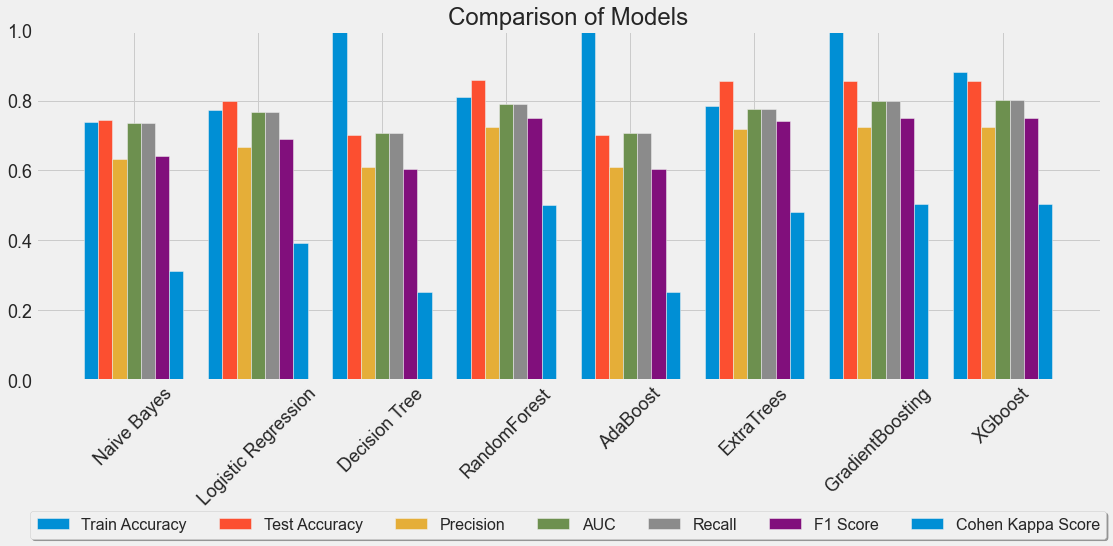

In [48]:
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'AUC Score','Recall','F1 Score', 'Cohen Kappa Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")


    plt.xticks(_X, X)

plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['AUC Score'], scoreDF['Recall'], scoreDF['F1 Score'], scoreDF['Cohen Kappa Score']])
plt.ylim(0, 1.0)
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'AUC','Recall','F1 Score', 'Cohen Kappa Score']
#plt.legend(cols)

plt.legend(cols, loc='upper center', bbox_to_anchor=(0.5, -0.35),
          fancybox=True, shadow=True, ncol=7)


plt.xlabel('Model', fontsize = 20)
plt.xticks(rotation = 45)

plt.title("Comparison of Models", fontsize = 24)
plt.show();

In [49]:
###

In [50]:
# scoreDF = scoreDF.set_index("Model")

In [51]:
# ax = scoreDF['AUC Score'].round(6).plot(kind = 'bar', color = 'orange');
#
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1., p.get_height() * 0.95))
# plt.title('AUC', fontsize = 18)
# plt.xticks(rotation = 60)
# plt.show();

In [52]:
# ax = scoreDF['F1 Score'].round(6).plot(kind = 'bar', color = 'lightblue');
#
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1., p.get_height() * 0.95))
# plt.title('F1 Score', fontsize = 18)
# plt.xticks(rotation = 60)
# plt.show();

## Ensemble on Simple base Models

### Weighted Averaging

In [53]:
# ensemble = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
#                                               ('Naive Bayes', GaussianNB()),
#                                               ('RF', RandomForestClassifier(random_state=random_state)),
#                                               ('KNN', KNeighborsClassifier()),
#                                               ('Decision Tree', DecisionTreeClassifier(random_state=random_state))],
#                                                voting='hard').fit(X_train,y_train)

In [54]:
# y_train_ensemble = ensemble.predict(X_train)
# y_pred_ensemble = ensemble.predict(X_test)
#
# trainaccuracy = accuracy_score(y_train, y_train_ensemble)
# testaccuracy = accuracy_score(y_test, y_pred_ensemble)
# train_accuracy.append(trainaccuracy)
# test_accuracy.append(testaccuracy)
# precision.append(precision_score(y_test, y_pred_ensemble, average='macro'))
# recall.append(recall_score(y_test, y_pred_ensemble, average='macro'))
# cohen_kappa.append(cohen_kappa_score(y_test, y_pred_ensemble))
# f1.append(f1_score(y_test, y_pred_ensemble, average='macro'))
# roc.append(metrics.roc_auc_score(y_test, y_pred_ensemble))
# mathew.append(metrics.matthews_corrcoef(y_test, y_pred_ensemble))

In [55]:
# print('\n Accuracy Score:\n', np.round(accuracy_score(y_test, y_pred_ensemble), 3))
# sns.heatmap(confusion_matrix(y_test,y_pred_ensemble),annot=True,fmt='2.0f')
# print('\n clasification report:\n', classification_report(y_test,y_pred_ensemble))
# print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(y_test, y_pred_ensemble))
#
# plt.show()

### Max Voting

In [56]:
# ensemble2 = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
#                                               ('Naive Bayes', GaussianNB()),
#                                               ('RF', RandomForestClassifier(random_state=random_state)),
#                                               ('KNN', KNeighborsClassifier()),
#                                               ('Decision Tree', DecisionTreeClassifier(random_state=random_state))],
#                                                voting='soft').fit(X_train,y_train)
#
# y_train_ensemble2 = ensemble2.predict(X_train)
# y_pred_ensemble2 = ensemble2.predict(X_test)
#
# trainaccuracy = accuracy_score(y_train, y_train_ensemble2)
# testaccuracy = accuracy_score(y_test, y_pred_ensemble2)
# train_accuracy.append(trainaccuracy)
# test_accuracy.append(testaccuracy)
# precision.append(precision_score(y_test, y_pred_ensemble2, average='macro'))
# recall.append(recall_score(y_test, y_pred_ensemble2, average='macro'))
# cohen_kappa.append(cohen_kappa_score(y_test, y_pred_ensemble2))
# f1.append(f1_score(y_test, y_pred_ensemble2, average='macro'))
# roc.append(metrics.roc_auc_score(y_test, y_pred_ensemble2))
# mathew.append(metrics.matthews_corrcoef(y_test, y_pred_ensemble2))
#
# print('\n Accuracy Score:\n', np.round(accuracy_score(y_test, y_pred_ensemble2), 3))
# sns.heatmap(confusion_matrix(y_test,y_pred_ensemble2),annot=True,fmt='2.0f')
# print('\n clasification report:\n', classification_report(y_test,y_pred_ensemble2))
# print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(y_test, y_pred_ensemble2))
# plt.show()

In [57]:
# models.append('Stack Ensemble (Hard Voting)')
# models.append('Stack Ensemble (Soft Voting)')
# scoreDF = pd.DataFrame({'Model' : models})
# scoreDF['Train Accuracy'] = train_accuracy
# scoreDF['Test Accuracy'] = test_accuracy
# scoreDF['Precision'] =  precision
# scoreDF['Recall'] =  recall
# scoreDF['F1 Score'] = f1
# scoreDF['AUC Score'] = roc
# scoreDF['Matthew Correlation Coefficient'] = mathew
# scoreDF['Cohen Kappa Score'] = cohen_kappa
#
# scoreDF = scoreDF.set_index("Model")

In [58]:
# scoreDF

In [59]:
# scoredf = scoreDF.copy()

In [60]:
# ax = scoreDF['AUC Score'].sort_values().round(6).plot(kind = 'barh', color = 'orange', figsize = (17,9));
# # create a list to collect the plt.patches data
# totals = []
#
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())
#
# # set individual bar lables using above list
# total = sum(totals)
# # set individual bar lables using above list
# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()*0.05, i.get_y()+0.1, \
#             str(round((i.get_width()), 4)), fontsize=20,
# color='white', fontweight = 'bold')
#
# plt.title('AUC Score', fontsize = 24)
# plt.xticks(rotation = 90)
# plt.show();

In [61]:
# ax = scoreDF['F1 Score'].sort_values().round(6).plot(kind = 'barh', color = 'orange', figsize = (17,9));
# # create a list to collect the plt.patches data
# totals = []
#
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())
#
# # set individual bar lables using above list
# total = sum(totals)
# # set individual bar lables using above list
# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()*0.05, i.get_y()+0.1, \
#             str(round((i.get_width()), 4)), fontsize=20,
# color='white', fontweight = 'bold')
#
# plt.title('F1 Score', fontsize = 18)
# plt.xticks(rotation = 90)
# plt.show();

In [62]:
# # Create copy of previous results
#
# train_accuracy_ =  train_accuracy
# test_accuracy_ = test_accuracy
# precision_ = precision
# recall_ = recall
# f1_ = f1
# cohen_kappa_ = cohen_kappa
# models_ = models
# roc_ = roc
# mathew_ = mathew

### Feature Selection - Random Forest Variable Importance

In [63]:
# # instantiate the classifier with n_estimators = 100
# clf = RandomForestClassifier(n_estimators=500, max_depth = 15, random_state=0)
# # fit the classifier to the training set
# clf.fit(X_train, y_train)
#
# # predict on the test set
# y_pred = clf.predict(X_test)
# # visualize feature importance

In [64]:
# plt.figure(num=None, figsize=(10,25), dpi=20, facecolor='w', edgecolor='k')
#
# feat_importances = pd.Series(clf.feature_importances_, index= X_train.columns)
# feat_importances.nlargest(180).plot(kind='barh')
# plt.title('Correlation by Weights')
# plt.yticks(fontsize = 12)
# plt.show();

In [65]:
# features_to_select = feat_importances.nlargest(100).index.tolist()
#
# X_train = X_train[features_to_select]
# X_test = X_test[features_to_select]
#
# train_accuracy = []
# test_accuracy = []
# precision = []
# recall = []
# f1 = []
# cohen_kappa = []
# models = ["Naive Bayes","Logistic Regression","Decision Tree","RandomForest", "AdaBoost", "ExtraTrees","GradientBoosting","XGboost"]
# roc = []
# mathew = []
# random_state = 2
# classifiers = []
# classifiers.append(BernoulliNB())
# classifiers.append(LogisticRegression())
# classifiers.append(DecisionTreeClassifier())
# classifiers.append(RandomForestClassifier(random_state=random_state, max_depth = 15, max_features = 'auto', n_estimators=  500))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.5))
# classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion ='gini', max_features = 'auto', min_samples_leaf = 20, min_samples_split = 15))
# classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate = 0.01, max_depth = 15, n_estimators = 500))
# classifiers.append(XGBClassifier(random_state = random_state))
#
#
#
# for classifier,model in zip(classifiers, models):
#     print('='*len(model))
#     print(model)
#     print('='*len(model))
#     classifier.fit(X_train, y_train)
#     trainprediction = classifier.predict(X_train)
#     prediction = classifier.predict(X_test)
#     trainaccuracy = accuracy_score(y_train, trainprediction)
#     testaccuracy = accuracy_score(y_test, prediction)
#     train_accuracy.append(trainaccuracy)
#     test_accuracy.append(testaccuracy)
#     precision.append(precision_score(y_test, prediction))
#     recall.append(recall_score(y_test, prediction))
#     cohen_kappa.append(cohen_kappa_score(y_test, prediction))
#     f1.append(f1_score(y_test, prediction))
#     roc.append(metrics.roc_auc_score(y_test, prediction))
#
#     mathew.append(metrics.matthews_corrcoef(y_test, prediction))
#
#     print('\n clasification report:\n', classification_report(y_test,prediction))
#     print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
#     print('\n')
#
# scoreDF = pd.DataFrame({'Model' : models})
# scoreDF['Train Accuracy'] = train_accuracy
# scoreDF['Test Accuracy'] = test_accuracy
# scoreDF['Precision'] =  precision
# scoreDF['Recall'] =  recall
# scoreDF['F1 Score'] = f1
# scoreDF['AUC Score'] = roc
# scoreDF['Matthew Correlation Coefficient'] = mathew
# scoreDF['Cohen Kappa Score'] = cohen_kappa
#
#
# scoreDF.set_index("Model")
#
# plt.style.use('bmh')
# params = {'legend.fontsize': '16',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': '20',
#          'axes.titlesize':'30',
#          'xtick.labelsize':'18',
#          'ytick.labelsize':'18'}
# plt.rcParams.update(params)
#
# def subcategorybar(X, vals, width=0.8):
#     cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score', 'Cohen Kappa Score']
#     n = len(vals)
#     _X = np.arange(len(X))
#     for i in range(n):
#         plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")
#
#
#     plt.xticks(_X, X)
#
# plt.figure(figsize = (17,6))
# subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score'], scoreDF['Cohen Kappa Score']])
# plt.ylim(0, 1.0)
# cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score', 'Cohen Kappa Score']
# plt.legend(cols)
# plt.xlabel('Model', fontsize = 20)
# plt.xticks(rotation = 45)
#
# plt.title("Comparison of Models", fontsize = 24)
# plt.show();

## Feature Selection Method - Recursive Feature Elimination

In [66]:
# from sklearn.feature_selection import RFE
# from sklearn.metrics import cohen_kappa_score
# X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=True)
# X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_train = X_train.fillna(method='ffill')
# X_test = X_test.fillna(method='bfill')
#
# ### Applying SMOTE on training data
#
# from imblearn.over_sampling import SMOTE
# X_train, y_train = SMOTE('minority').fit_resample(X_train, y_train)
# Y_train = y_train.copy()
#
# print('Train data shape: {}'.format(X_train.shape))
# print('Test data shape: {}'.format(X_test.shape))
#
# rfe_selector = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=100, step=10, verbose=3)
# rfe_selector.fit(X_train, y_train)

In [67]:
# rfe_support = rfe_selector.get_support()
# rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
# print(str(len(rfe_feature)), 'selected features')

In [68]:
# X_train = X_train[rfe_feature]
# X_test = X_test[rfe_feature]

In [69]:
# train_accuracy = []
# test_accuracy = []
# precision = []
# recall = []
# f1 = []
# cohen_kappa = []
# models = ["Naive Bayes","Logistic Regression","Decision Tree","RandomForest", "AdaBoost", "ExtraTrees","GradientBoosting","XGboost"]
# roc = []
# mathew = []
# random_state = 2
# classifiers = []
# classifiers.append(BernoulliNB())
# classifiers.append(LogisticRegression())
# classifiers.append(DecisionTreeClassifier())
# classifiers.append(RandomForestClassifier(random_state=random_state, max_depth = 15, max_features = 'auto', n_estimators=  500))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.5))
# classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion ='gini', max_features = 'auto', min_samples_leaf = 20, min_samples_split = 15))
# classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate = 0.01, max_depth = 15, n_estimators = 500))
# classifiers.append(XGBClassifier(random_state = random_state))
#
#
#
# for classifier,model in zip(classifiers, models):
#     print('='*len(model))
#     print(model)
#     print('='*len(model))
#     classifier.fit(X_train, y_train)
#     trainprediction = classifier.predict(X_train)
#     prediction = classifier.predict(X_test)
#     trainaccuracy = accuracy_score(y_train, trainprediction)
#     testaccuracy = accuracy_score(y_test, prediction)
#     train_accuracy.append(trainaccuracy)
#     test_accuracy.append(testaccuracy)
#     precision.append(precision_score(y_test, prediction))
#     recall.append(recall_score(y_test, prediction))
#     cohen_kappa.append(cohen_kappa_score(y_test, prediction))
#     f1.append(f1_score(y_test, prediction))
#     roc.append(metrics.roc_auc_score(y_test, prediction))
#
#     mathew.append(metrics.matthews_corrcoef(y_test, prediction))
#
#     print('\n clasification report:\n', classification_report(y_test,prediction))
#     print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
#     print('\n')
#
# scoreDF = pd.DataFrame({'Model' : models})
# scoreDF['Train Accuracy'] = train_accuracy
# scoreDF['Test Accuracy'] = test_accuracy
# scoreDF['Precision'] =  precision
# scoreDF['Recall'] =  recall
# scoreDF['F1 Score'] = f1
# scoreDF['AUC Score'] = roc
# scoreDF['Matthew Correlation Coefficient'] = mathew
# scoreDF['Cohen Kappa Score'] = cohen_kappa
#
#
# scoreDF.set_index("Model")

In [70]:
# plt.style.use('bmh')
# params = {'legend.fontsize': '16',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': '20',
#          'axes.titlesize':'30',
#          'xtick.labelsize':'18',
#          'ytick.labelsize':'18'}
# plt.rcParams.update(params)
#
# def subcategorybar(X, vals, width=0.8):
#     cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score', 'Cohen Kappa Score']
#     n = len(vals)
#     _X = np.arange(len(X))
#     for i in range(n):
#         plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")
#
#
#     plt.xticks(_X, X)
#
# plt.figure(figsize = (17,6))
# subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score'], scoreDF['Cohen Kappa Score']])
# plt.ylim(0, 1.0)
# cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score', 'Cohen Kappa Score']
# plt.legend(cols)
# plt.xlabel('Model', fontsize = 20)
# plt.xticks(rotation = 45)
#
# plt.title("Comparison of Models", fontsize = 24)
# plt.show();

## Ensemble on Simple base Models

### Simple Averaging

In [71]:
# random_state = 123
# LR = LogisticRegression(random_state = random_state, n_jobs=-1)
# NB = BernoulliNB()
# KNN = KNeighborsClassifier(n_jobs=-1)
# DT = DecisionTreeClassifier(random_state=random_state)
# RF = RandomForestClassifier(random_state=random_state)
# BG = BaggingClassifier()
# XGB = XGBClassifier()
# ADA = AdaBoostClassifier()
# GBM = GradientBoostingClassifier()
# ET = ExtraTreesClassifier()
#
#
# LR.fit(X_train, y_train)
# NB.fit(X_train, y_train)
# RF.fit(X_train, y_train)
# KNN.fit(X_train, y_train)
# DT.fit(X_train, y_train)
# BG.fit(X_train, y_train)
# XGB.fit(X_train, y_train)
# ADA.fit(X_train, y_train)
# GBM.fit(X_train, y_train)
# ET.fit(X_train, y_train)

In [72]:
# LR_pred = LR.predict(X_test)
# NB_pred = NB.predict(X_test)
# RF_pred = RF.predict(X_test)
# KNN_pred = KNN.predict(X_test)
# DT_pred = DT.predict(X_test)
# BG_pred = BG.predict(X_test)
# ADA_pred = BG.predict(X_test)
# XGB_pred = BG.predict(X_test)
# ET_pred = BG.predict(X_test)
# GBM_pred = BG.predict(X_test)

In [73]:
# averaged_preds = (LR_pred + NB_pred + RF_pred + KNN_pred + DT_pred + BG_pred + ADA_pred +XGB_pred + ET_pred + GBM_pred)//10
# acc = accuracy_score(y_test, averaged_preds)
# print('\n Accuracy Score:\n', np.round(acc, 3))
#
# print('\n clasification report:\n', classification_report(y_test,averaged_preds))
# print('\n confussion matrix:\n', metrics.confusion_matrix(y_test, averaged_preds))
# print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(y_test, averaged_preds))
#
# print('\n')

### Weighted Averaging

In [74]:
# ensemble = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
#                                               ('Naive Bayes', GaussianNB()),
#                                               ('RF', RandomForestClassifier(random_state=random_state)),
#                                               ('KNN', KNeighborsClassifier()),
#                                               ('Decision Tree', DecisionTreeClassifier(random_state=random_state)),
#                                        ('Bagging Classifier', BaggingClassifier(random_state = random_state)),
#                                               ('GBM', GradientBoostingClassifier()),
#                                               ('ADA', AdaBoostClassifier(random_state=random_state)),
#                                               ('ET', ExtraTreesClassifier()),
#                                               ('XGB', XGBClassifier(random_state=random_state))
#
#
#
#                                        ],
#                                                voting='hard').fit(X_train,y_train)
#
# y_pred_ensemble = ensemble.predict(X_test)

In [75]:
# y_train_ensemble = ensemble.predict(X_train)
# y_pred_ensemble = ensemble.predict(X_test)
#
# trainaccuracy = accuracy_score(y_train, y_train_ensemble)
# testaccuracy = accuracy_score(y_test, y_pred_ensemble)
# train_accuracy.append(trainaccuracy)
# test_accuracy.append(testaccuracy)
# precision.append(precision_score(y_test, y_pred_ensemble, average='macro'))
# recall.append(recall_score(y_test, y_pred_ensemble, average='macro'))
# cohen_kappa.append(cohen_kappa_score(y_test, y_pred_ensemble))
# f1.append(f1_score(y_test, y_pred_ensemble, average='macro'))
# roc.append(metrics.roc_auc_score(y_test, y_pred_ensemble))
# mathew.append(metrics.matthews_corrcoef(y_test, y_pred_ensemble))
#
# print('\n Accuracy Score:\n', np.round(accuracy_score(y_test, y_pred_ensemble), 3))
# sns.heatmap(confusion_matrix(y_test,y_pred_ensemble),annot=True,fmt='2.0f')
# print('\n clasification report:\n', classification_report(y_test,y_pred_ensemble))
# print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(y_test, y_pred_ensemble))
#
# plt.show()

### Max Voting

In [76]:
# ensemble = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
#                                               ('Naive Bayes', GaussianNB()),
#                                               ('RF', RandomForestClassifier(random_state=random_state)),
#                                               ('KNN', KNeighborsClassifier()),
#                                               ('Decision Tree', DecisionTreeClassifier(random_state=random_state)),
#                                        ('Bagging Classifier', BaggingClassifier(random_state = random_state)),
#                                               ('GBM', GradientBoostingClassifier()),
#                                               ('ADA', AdaBoostClassifier(random_state=random_state)),
#                                               ('ET', ExtraTreesClassifier()),
#                                               ('XGB', XGBClassifier(random_state=random_state))
#
#
#
#                                        ],
#                                                voting='soft').fit(X_train,y_train)
#
# y_pred_ensemble = ensemble.predict(X_test)
#
# y_train_ensemble = ensemble.predict(X_train)
# y_pred_ensemble = ensemble.predict(X_test)
#
# trainaccuracy = accuracy_score(y_train, y_train_ensemble)
# testaccuracy = accuracy_score(y_test, y_pred_ensemble)
# train_accuracy.append(trainaccuracy)
# test_accuracy.append(testaccuracy)
# precision.append(precision_score(y_test, y_pred_ensemble, average='macro'))
# recall.append(recall_score(y_test, y_pred_ensemble, average='macro'))
# cohen_kappa.append(cohen_kappa_score(y_test, y_pred_ensemble))
# f1.append(f1_score(y_test, y_pred_ensemble, average='macro'))
# roc.append(metrics.roc_auc_score(y_test, y_pred_ensemble))
# mathew.append(metrics.matthews_corrcoef(y_test, y_pred_ensemble))
#
#
# print('\n Accuracy Score:\n', np.round(accuracy_score(y_test, y_pred_ensemble), 3))
# sns.heatmap(confusion_matrix(y_test,y_pred_ensemble),annot=True,fmt='2.0f')
# print('\n clasification report:\n', classification_report(y_test,y_pred_ensemble))
# print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(y_test, y_pred_ensemble))
# plt.show()

In [77]:
# models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree',
#            'RandomForest', 'AdaBoost', 'ExtraTrees', 'GradientBoosting',
#            'XGboost', 'Stack Ensemble (Hard Voting)', 'Stack Ensemble (Soft Voting)']

In [78]:
# train_accuracy

In [79]:
# scoreDF = pd.DataFrame({'Model' : models})
# scoreDF['Train Accuracy'] = train_accuracy[:10]
# scoreDF['Test Accuracy'] = test_accuracy[:10]
# scoreDF['Precision'] =  precision[:10]
# scoreDF['Recall'] =  recall[:10]
# scoreDF['F1 Score'] = f1[:10]
# scoreDF['AUC Score'] = roc[:10]
# scoreDF['Matthew Correlation Coefficient'] = mathew[:10]
# scoreDF['Cohen Kappa Score'] = cohen_kappa[:10]
#
# scoreDF = scoreDF.set_index("Model")

In [80]:
# ax = scoreDF['AUC Score'].sort_values().round(6).plot(kind = 'barh', color = 'orange', figsize = (17,9));
# # create a list to collect the plt.patches data
# totals = []
#
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())
#
# # set individual bar lables using above list
# total = sum(totals)
# # set individual bar lables using above list
# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()*0.05, i.get_y()+0.1, \
#             str(round((i.get_width()), 4)), fontsize=20,
# color='white', fontweight = 'bold')
#
# plt.title('AUC Score with Feature Selection ', fontsize = 24)
# plt.xticks(rotation = 90)
# plt.show();

In [81]:
# ax = scoreDF['F1 Score'].sort_values().round(6).plot(kind = 'barh', color = 'orange', figsize = (17,9));
# # create a list to collect the plt.patches data
# totals = []
#
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())
#
# # set individual bar lables using above list
# total = sum(totals)
# # set individual bar lables using above list
# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()*0.05, i.get_y()+0.1, \
#             str(round((i.get_width()), 4)), fontsize=20,
# color='white', fontweight = 'bold')
#
# plt.title('F1 Score with Feature Selection', fontsize = 18)
# plt.xticks(rotation = 90)
# plt.show();

## Deep Learning based Ensembles

In [82]:
# import scipy
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam # I believe this is better optimizer for our case
# from tensorflow.keras.preprocessing.image import ImageDataGenerator # to augmenting our images for increasing accuracy
# from tensorflow.keras.utils import plot_model
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)

In [83]:
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)

In [84]:
# def model_ANN1(input_shape=X_train.shape[1], num_classes=2):
#     model = Sequential()
#
#     model.add(Dense(128, activation='tanh', input_dim=X_train.shape[1]))
#     model.add(Dropout(0.2))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(8, activation='relu'))
#     model.add(Dropout(0.2))
#     # Lets add softmax activated neurons as much as number of classes
#     model.add(Dense(1, activation = "sigmoid"))
#     # Compile the model with loss and metrics
#     model.compile(optimizer =  Adam(learning_rate = 0.001, decay = 1e-5) , loss = "binary_crossentropy", metrics=["accuracy"])
#
#     return model

In [85]:
# def model_ANN2(input_shape=X_train.shape[1], num_classes=2):
#     model = Sequential()
#     model.add(Dense(128, activation='tanh',  input_dim=X_train.shape[1]))
#     model.add(Dropout(0.4))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(8, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(4, activation='relu'))
#     model.add(Dropout(0.4))
#
#     # Lets add softmax activated neurons as much as number of classes
#     model.add(Dense(1, activation = "sigmoid"))
#     # Compile the model with loss and metrics
#     model.compile(optimizer =  Adam(learning_rate = 0.001, decay = 1e-5) , loss = "binary_crossentropy", metrics=["accuracy"])
#
#     return model

In [86]:
# ANN_model1 = model_ANN1(input_shape=X_train.shape[1], num_classes=2)
# ANN_model2 = model_ANN2(input_shape=X_train.shape[1], num_classes=2)

In [87]:
# ANN_model1.summary()

In [88]:
# ANN_model2.summary()

In [89]:
# dot_img_file = 'model_1.png'
# plot_model(ANN_model1, to_file=dot_img_file, show_shapes=True)

In [90]:
# model = []
# model.append(ANN_model1)
# model.append(ANN_model2)

In [91]:
# # Start multiple model training with the batch size
# # Use Reduce LR on Plateau for reducing Learning Rate if there is no decrease at loss for 3 epochs
# models = []
# for i in range(len(model)):
#     model[i].fit(X_train,y_train, batch_size=256,
#                                         epochs = 100,
#                                         validation_data = (X_test,y_test),
#                                         callbacks=[ReduceLROnPlateau(monitor='loss', patience=3, factor=0.1)],
#                                         verbose=2)
#     models.append(model[i])

In [92]:
# ANN1_preds = (model[0].predict(X_test) > 0.5).astype("int32")
# ANN2_preds = (model[1].predict(X_test) > 0.5).astype("int32")
# preds = pd.DataFrame({"ANN1" : ANN1_preds.ravel(), "ANN2" : ANN2_preds.ravel()})
# ANN_ensemble_predicted = preds.mode(axis=1)
# final_preds = ANN_ensemble_predicted.iloc[:, 0].astype("int32")
#
# from sklearn import metrics
# CM=metrics.confusion_matrix(y_test,final_preds)
# sns.heatmap(CM,annot=True,fmt='2.0f')
#
# TN = CM[0][0]
# FN = CM[1][0]
# TP = CM[1][1]
# FP = CM[0][1]
# specificity = TN/(TN+FP)
# loss_log = metrics.log_loss(y_test, final_preds)
# acc= accuracy_score(y_test, final_preds)
# roc=metrics.roc_auc_score(y_test, final_preds)
# prec = metrics.precision_score(y_test, final_preds)
# rec = metrics.recall_score(y_test, final_preds)
# f1 = metrics.f1_score(y_test, final_preds)
#
# mathew = metrics.matthews_corrcoef(y_test, final_preds)
# ck = cohen_kappa_score(y_test, final_preds)
#
# ANN1_preds = (model[0].predict(X_train) > 0.5).astype("int32")
# ANN2_preds = (model[1].predict(X_train) > 0.5).astype("int32")
# preds = pd.DataFrame({"ANN1" : ANN1_preds.ravel(), "ANN2" : ANN2_preds.ravel()})
# ANN_ensemble_predicted = preds.mode(axis=1)
# final_preds = ANN_ensemble_predicted.iloc[:, 0].astype("int32")
#
#
#
# train_acc= accuracy_score(y_train, final_preds)

In [93]:
# model_results =pd.DataFrame([['ANN Ensemble Classifier',train_acc, acc, prec,rec, f1,roc,mathew, ck]],
#                columns = ['Model', 'Train Accuracy', 'Test Accuracy','Precision', 'Recall', 'F1 Score','AUC Score','Matthew Correlation Coefficient', 'Cohen Kappa Score'])
#
#
# model_results = model_results.set_index('Model')
#
# model_results.index.name = None
#
# model_results

In [94]:
# scoreDF = pd.concat([scoreDF.iloc[:10,:8], model_results], axis = 0)
# scoreDF